In [2]:
from sklearn import datasets
import pandas as pd
import numpy as np
import scipy.stats as st 
import matplotlib.pyplot as plt

# 1. 載入iris資料集作為示範

In [3]:
iris = datasets.load_iris()  # 以字典型態載入

In [23]:
# 用表格呈現前五筆(除了features以外，新增一欄位紀錄鳶尾花品種)

table = pd.DataFrame(iris["data"],columns = iris["feature_names"])
table["target"] = [iris["target_names"][d] for d in iris["target"]]
table.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


* 其他所有提供的分配
https://docs.scipy.org/doc/scipy/reference/stats.html<br>
例如：st.t.rvs(df, loc=0, scale=1, size=1, random_state=None)

# 2. 查表

以下皆以Z分配示範。<br>
已知Z分配的pdf為：
$f(x)=\frac{exp(\frac{-x^2}{2})}{\sqrt{2\pi}}$
## 2.1 求$P(x_0)$ : st.norm.pdf

In [4]:
# 在 Normal(mean = 0, s.d. = 1)之中，x=0的機率為:

print("scipy的運算結果為：",st.norm.pdf(0,loc = 0,scale = 1))
print("照數學式驗算結果為：",1/((2*np.pi)**(1/2)))

scipy的運算結果為： 0.3989422804014327
照數學式驗算結果為： 0.3989422804014327


In [5]:
# 在 Normal(mean = 0, s.d. = 1)之中，x=1的機率為:

print("scipy的運算結果為：",st.norm.pdf(1,loc = 0,scale = 1))
print("照數學式驗算結果為：",np.exp(-1/2)/((2*np.pi)**(1/2)))

scipy的運算結果為： 0.24197072451914337
照數學式驗算結果為： 0.24197072451914337


In [8]:
st.norm.pdf(1.96)

0.058440944333451476

## 2.2 求$P(X< x_0)$ : st.norm.cdf

In [ ]:
st.norm.cdf(0,loc=0,scale=1) 

In [ ]:
# 驗證empirical rule

print("左右3個標準差內：",st.norm.cdf(3,loc=0,scale=1) - st.norm.cdf(-3,loc=0,scale=1))
print("左右2個標準差內：",st.norm.cdf(2,loc=0,scale=1) - st.norm.cdf(-2,loc=0,scale=1))
print("左右1個標準差內：",st.norm.cdf(1,loc=0,scale=1) - st.norm.cdf(-1,loc=0,scale=1))

## 2.3 得$P(X< x_0)$，求$x_0$？（已知cdf及其分配）<br>
ppf是cdf的反函數

$\Phi(0.5)$

In [ ]:
st.norm.ppf(0.5, loc=0, scale=1)

$\Phi(0.975)$

In [ ]:
st.norm.ppf(0.975, loc=0, scale=1)

$\Phi(0.995)$

# 3. 檢定

## 3.1 單母體T檢定
`scipy.stats.ttest_1samp(observations, expected mean, alternative='two-sided')`<br>
[source](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_1samp.html)

> **練習:**<br>
iris資料集中，sepal length(cm)的平均數是否大於5？<br>
$H_{0}: The\ mean\ of\ sepal\ length\ (cm)\ is\ less\ than\ 5.$ <br>
$H_{1}: The\ mean\ of\ sepal\ length\ (cm)\ is\ greater\ than\ or\ equal\ to\ 5.$

In [8]:
result = st.ttest_1samp(table["sepal length (cm)"],5.0,alternative='greater')
print(f"T統計值為{result.statistic}，p value為{result.pvalue}")

T統計值為12.473257146694761，p value為3.3353711499009633e-25


### check the result

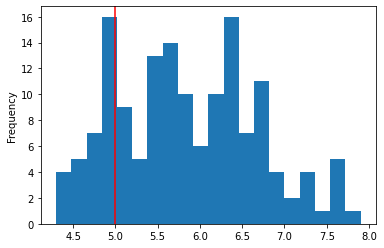

In [14]:
table["sepal length (cm)"].plot.hist(bins = 20)
plt.axvline(5,color = "red")

## 3.2 兩獨立母體平均數T檢定
`scipy.stats.ttest_ind(樣本a, 樣本b, equal_var=True, alternative='two-sided')`<br>
[source](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html)

> **練習:**<br>
iris資料集中，sepal length(cm)的平均數是否不同於petal length(cm)？<br>
$H_{0}: The\ mean\ of\ sepal\ length\ (cm)\ equals\ the\ mean\ of\ petal\ length\ (cm)$ <br>
$H_{1}: The\ mean\ of\ sepal\ length\ (cm)\ does\ not\ equal\ the\ mean\ of\ petal\ length\ (cm)$

### 令變異數相同: equal_var=True (default)

In [15]:
result = st.ttest_ind(table["sepal length (cm)"], table["petal length (cm)"])
print(f"T統計值為{result.statistic}，p value為{result.pvalue}")

T統計值為13.09835310896086，p value為2.8571040695819004e-31


### 令變異數不同: equal_var=False

In [16]:
result = st.ttest_ind(table["sepal length (cm)"], table["petal length (cm)"],equal_var=False)
print(f"T統計值為{result.statistic}，p value為{result.pvalue}")

T統計值為13.09835310896086，p value為4.262173272631899e-29


### check the result

<AxesSubplot:ylabel='Frequency'>

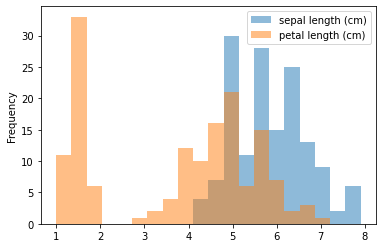

In [19]:
table[["sepal length (cm)","petal length (cm)"]].plot.hist(bins = 20,alpha = 0.5)

In [21]:
table[["sepal length (cm)","petal length (cm)"]].mean()

sepal length (cm)    5.843333
petal length (cm)    3.758000
dtype: float64

## 3.3 兩不獨立母體平均數T檢定
`scipy.stats.ttest_rel(樣本a, 樣本b, alternative='two-sided')`<br>
[source](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html)<br>
> **練習:**<br>
若假定sepal length(cm)與petal length(cm)來自兩不獨立母體，則欲求兩者是否平均數相異？

In [50]:
result = st.ttest_rel(table["sepal length (cm)"], table["petal length (cm)"])
print(f"T統計值為{result.statistic}，p value為{result.pvalue}")

T統計值為22.81321951765914，p value為1.7996292277334387e-50


## 3.4 one-way ANOVA

`scipy.stats.f_oneway(樣本a, 樣本b, 樣本c, ...)`<br>
[source](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html)

> **練習:**<br>
iris資料集中，各個鳶尾花品種的sepal length(cm)平均數是否相異？<br>
$H_{0}: The\ means\ of\ sepal\ length\ (cm)\ of\ setosa,\ versicolor,\ and\  virginica\ are\ equivalent.$ <br>
$H_{1}: The\ means\ of\ sepal\ length\ (cm)\ of\ setosa,\ versicolor,\ and\  virginica\ are\ not\ equivalent.$ 

In [49]:
result = st.f_oneway(table[table["target"]=="setosa"]["sepal length (cm)"],     # setosa的 sepal length (cm)
                     table[table["target"]=="versicolor"]["sepal length (cm)"], # versicolor的 sepal length (cm)
                     table[table["target"]=="virginica"]["sepal length (cm)"])  # virginica的 sepal length (cm)
print(f"F統計值為{result.statistic}，p value為{result.pvalue}")

F統計值為119.26450218450468，p value為1.6696691907693826e-31


### check the result

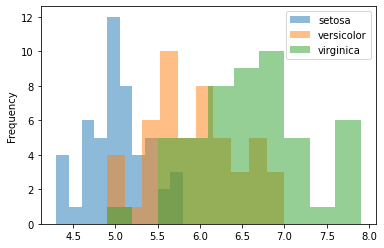

In [42]:
table.groupby('target')['sepal length (cm)'].plot.hist(legend=True,alpha = 0.5)
plt.show()

## 3.4 卡方檢定
The chi-square test tests the null hypothesis that the categorical data has the given frequencies.<br>
`scipy.stats.chisquare(categorical樣本分佈情形, categorical樣本理想分佈情形)`<br>
[source](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chisquare.html)

> **練習:**<br>
iris資料集中，𝑠𝑒𝑡𝑜𝑠𝑎, 𝑣𝑒𝑟𝑠𝑖𝑐𝑜𝑙𝑜𝑟, 𝑎𝑛𝑑 𝑣𝑖𝑟𝑔𝑖𝑛𝑖𝑐𝑎的筆數是否符合 50, 50, 50？<br>
$H_{0}: The\ number\ of\ observations\ of\ setosa,\ versicolor,\ and\  virginica\ are\ equivalent.$ <br>
$H_{1}: The\ number\ of\ observations\ of\ setosa,\ versicolor,\ and\  virginica\ are\ not\ equivalent.$ <br>

In [48]:
result = st.chisquare(table["target"].value_counts(),[50,50,50])
print(f"卡方值為{result.statistic}，p value為{result.pvalue}")

卡方值為0.0，p value為1.0


### check the result

<AxesSubplot:>

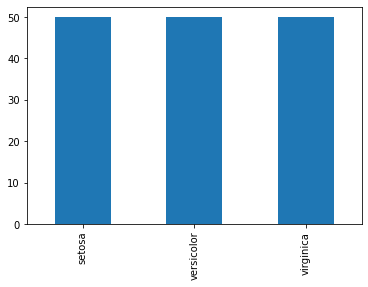

In [53]:
table["target"].value_counts().plot.bar()